<a href="https://colab.research.google.com/github/caprolaliac/MLPrac/blob/main/sentiment-analysis/roberta_sentiment_analysis_failed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Loading AND EDA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk

In [2]:
df=pd.read_csv('/content/drive/MyDrive/yelp_review_fine-grained_5_classes_csv/train.csv')

In [3]:
print(df.shape)

(650000, 2)


In [4]:
df=df.head(10000)
print(df.shape)

(10000, 2)


In [5]:
df.head()

,class_index,review_text
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


In [6]:
df.rename(columns={'class_index': 'rating', 'review_text': 'review'}, inplace=True)

In [7]:
df['index'] = range(1, len(df) + 1)

In [8]:
first_column = df.pop('index')
df.insert(0, 'index', first_column)

In [9]:
df.head(10)

,index,rating,review
0,1,5,dr. goldberg offers everything i look for in a...
1,2,2,"Unfortunately, the frustration of being Dr. Go..."
2,3,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,4,Got a letter in the mail last week that said D...
4,5,1,I don't know what Dr. Goldberg was like before...
5,6,5,Top notch doctor in a top notch practice. Can'...
6,7,5,Dr. Eric Goldberg is a fantastic doctor who ha...
7,8,1,I'm writing this review to give you a heads up...
8,9,2,Wing sauce is like water. Pretty much a lot of...
9,10,3,Decent range somewhat close to the city. The ...


In [10]:
r=df['rating'].value_counts().sort_index()
r

rating
1    1788
2    2168
3    2361
4    2082
5    1601
Name: count, dtype: int64

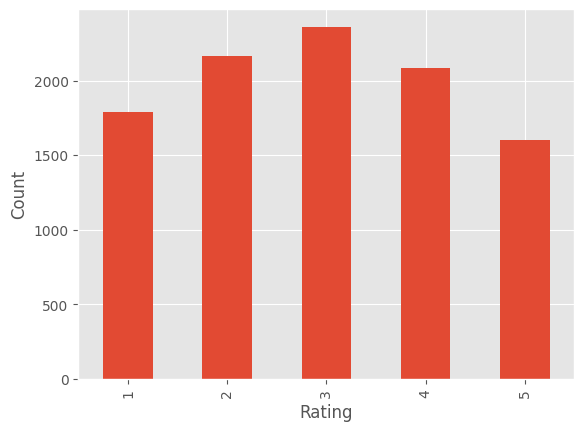

In [11]:
pp=r.plot(kind='bar')
pp.set_xlabel('Rating')
pp.set_ylabel('Count')
plt.show()

## Vader

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sia=SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores("dr. goldberg offers everything i look for in a general practitioner. he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first. really, what more do you need? i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.")

{'neg': 0.02, 'neu': 0.921, 'pos': 0.059, 'compound': 0.3708}

In [15]:
sia.polarity_scores("Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I feel that I have to give Dr. Goldberg 2 stars.")

{'neg': 0.124, 'neu': 0.852, 'pos': 0.024, 'compound': -0.8997}

In [16]:
sia.polarity_scores("Decent range somewhat close to the city. The mats are pretty solid; however, the grass range needs to be tended too. It's like hitting out of US Open type rough...not very amenable to practicing. Which kind of defeats the purpose of going to a golf range...Still gets 3 stars because the range is lit up at night which is excellent for those of us who are addicted to this amazing game, but are somewhat short on time (having a job kinda sucks sometimes, no?).")

{'neg': 0.052, 'neu': 0.833, 'pos': 0.115, 'compound': 0.5637}

In [17]:
# sia.polarity_scores() for entire dataset

res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text=row['review']
  myid=row['index']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [18]:
res

{1: {'neg': 0.02, 'neu': 0.921, 'pos': 0.059, 'compound': 0.3708},
 2: {'neg': 0.124, 'neu': 0.852, 'pos': 0.024, 'compound': -0.8997},
 3: {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.6249},
 4: {'neg': 0.097, 'neu': 0.856, 'pos': 0.047, 'compound': -0.4075},
 5: {'neg': 0.141, 'neu': 0.77, 'pos': 0.09, 'compound': -0.9439},
 6: {'neg': 0.023, 'neu': 0.714, 'pos': 0.263, 'compound': 0.9526},
 7: {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.8074},
 8: {'neg': 0.045, 'neu': 0.865, 'pos': 0.089, 'compound': 0.6678},
 9: {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.91},
 10: {'neg': 0.052, 'neu': 0.833, 'pos': 0.115, 'compound': 0.5637},
 11: {'neg': 0.069, 'neu': 0.853, 'pos': 0.078, 'compound': 0.4657},
 12: {'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.7096},
 13: {'neg': 0.021, 'neu': 0.847, 'pos': 0.131, 'compound': 0.8574},
 14: {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.7579},
 15: {'neg': 0.026, 'neu': 0.789, 'pos': 0.185, 'compou

In [19]:
vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders=vaders.merge(df, how='left')

In [20]:
vaders.head()

,index,neg,neu,pos,compound,rating,review
0,1,0.020,0.921,0.059,0.3708,5,dr. goldberg offers everything i look for in a...
1,2,0.124,0.852,0.024,-0.8997,2,"Unfortunately, the frustration of being Dr. Go..."
2,3,0.000,0.957,0.043,0.6249,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,0.097,0.856,0.047,-0.4075,4,Got a letter in the mail last week that said D...
4,5,0.141,0.770,0.090,-0.9439,1,I don't know what Dr. Goldberg was like before...


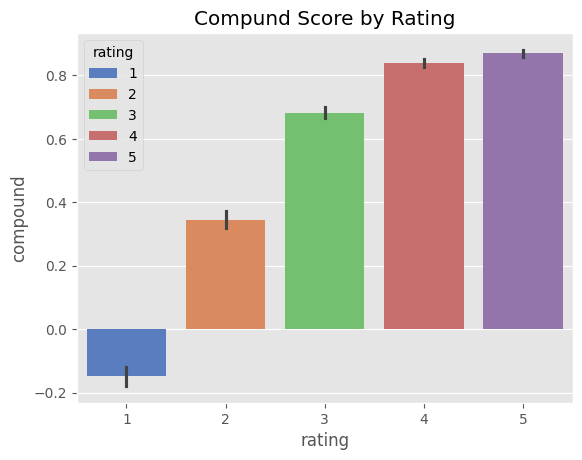

In [21]:
pp = sns.barplot(data=vaders, x='rating', y='compound', hue='rating', palette= 'muted' )
pp.set_title('Compund Score by Rating')
plt.show()

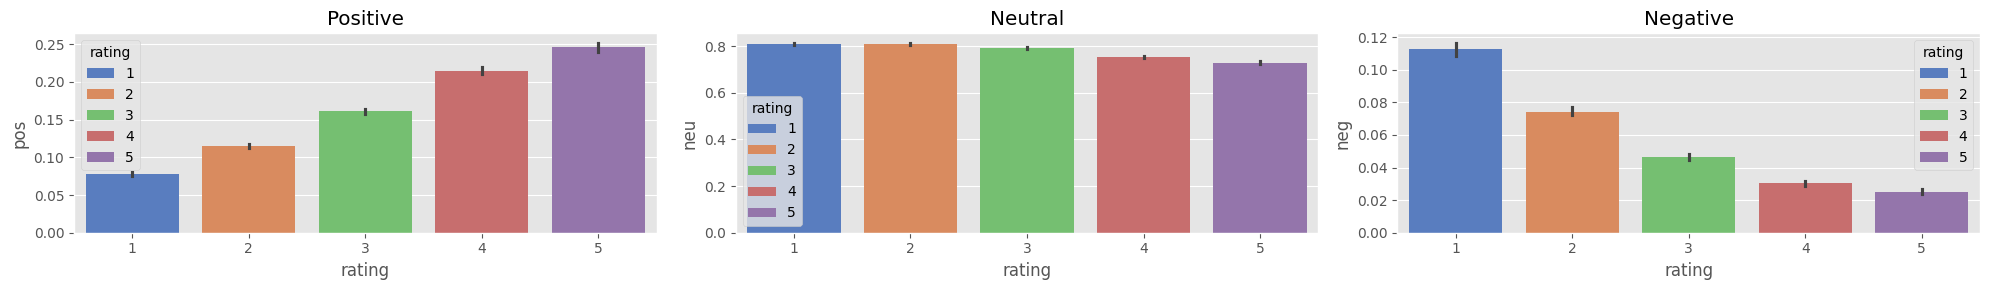

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0], hue='rating', palette='muted')
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1], hue='rating', palette='muted')
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2], hue='rating', palette='muted')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

##roBERTa

In [23]:
from transformers import AutoTokenizer, RobertaTokenizer
from transformers import AutoModelForSequenceClassification, RobertaForSequenceClassification

In [24]:
from scipy.special import softmax

In [47]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)
r_model=RobertaForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassifi

In [49]:
example="I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an $800.00 bill for the blood work. I can't pay for my bill because I'm a student and don't have any cash flow at this current time. I can't believe the Doctor wouldn't give me a heads up to make sure my insurance would cover work that wasn't necessary and was strictly preventative. The office can't do anything to help me cover the bill. In addition, the office staff said the onus is on me to make sure my insurance covers visits. Frustrating situation!"

In [50]:
encoded_text = tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   100,   437,  2410,    42,  1551,     7,   492,    47,    10,
          3885,    62,   137,    47,   192,    42, 12521,     4,    20,   558,
           813,     8,   942,    32,   182,   542, 23878,     4,    38,   314,
            10,  1579,    19,  1533,    82,  2624,   127,  1087,     6,     8,
           117,    65,   655,   373,   162,   124,     4,    38,    56,     7,
          1368,  9834,   106,     7,   120,    41,  1948,    59,   127,  1087,
             4,  1437, 50118, 50118, 32703,     6,     8,   144,   505,     6,
           146,   686,   110,  1911,    16,   164,     7,  1719,   925,     4,
         18835,    18,  5695,     8,  1925,   173,     4,    91,  5131,     7,
           162,    14,    38,   120,    10,  2166,     6,     8,    37,  1467,
            38,    21,    10,  1294,   142,    38,   174,   123,     4,    38,
           300,     5,  2166,   626,     4,  6811,     6,    38,   303,    66,
           127,   474,  1911,   630,  

In [51]:
output=model(**encoded_text)

In [52]:
r_output=r_model(**encoded_text)

In [53]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.8876,  0.3090, -2.3972]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [54]:
r_output

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.8876,  0.3090, -2.3972]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [55]:
output[0][0]

tensor([ 1.8876,  0.3090, -2.3972], grad_fn=<SelectBackward0>)

In [56]:
r_output[0][0]

tensor([ 1.8876,  0.3090, -2.3972], grad_fn=<SelectBackward0>)

In [57]:
output[0][0].detach()

tensor([ 1.8876,  0.3090, -2.3972])

In [58]:
output[0][0].detach().numpy()

array([ 1.8875602,  0.3090337, -2.3972366], dtype=float32)

In [59]:
output[0][0].detach().numpy()

array([ 1.8875602,  0.3090337, -2.3972366], dtype=float32)

In [60]:
scores=r_output[0][0].detach().numpy()
scores

array([ 1.8875602,  0.3090337, -2.3972366], dtype=float32)

In [61]:
scores=softmax(scores)
scores

array([0.81963503, 0.16907336, 0.01129164], dtype=float32)

In [62]:
scores_dict={
    'r_neg': scores[0],
    'r_neu': scores[1],
    'r_pos': scores[2]
}
scores_dict

{'r_neg': 0.81963503, 'r_neu': 0.16907336, 'r_pos': 0.011291638}

In [63]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'r_neg' : scores[0],
        'r_neu' : scores[1],
        'r_pos' : scores[2]
    }
    return scores_dict

In [64]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
r_model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [65]:
result = {}
error_count = 0

for i, row in tqdm(df.iterrows(), total=len(df)):

    try:

        text = row['review']
        myid = row['index']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"v_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except (RuntimeError, IndexError) as e:
        #error_count += 1
        # print(f"Error for index {myid}: {e}")
        try:
            # Truncate text to 512 tokens properly
            truncated_text = tokenizer.decode(tokenizer.encode(text, max_length=512, truncation=True, add_special_tokens=True))

            # VADER Sentiment Analysis on truncated text
            vader_result = sia.polarity_scores(truncated_text)
            vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}

            # RoBERTa Sentiment Analysis on truncated text
            roberta_result = polarity_scores_roberta(truncated_text)
            both = {**vader_result_rename, **roberta_result}
            result[myid] = both
        except (RuntimeError, IndexError) as e:
            #print(f'Broke for id {myid} even after truncation: {e}')
            #res[myid] = "Error processing text"
            error_count += 1
print(f'Total errors encountered: {error_count}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Total errors encountered: 10000
